In [118]:
import statistics
from collections import defaultdict

In [1]:
emoji_file = "../data/emoji_joined.txt" # https://github.com/uclnlp/emoji2vec/blob/master/data/raw_training_data/emoji_joined.txt

In [136]:
emoji_desc = {}
desc_emoji = {}
with open(emoji_file, "r") as f:
    for line in f:
        split_line = line.replace("\n", "").split("\t")
        desc = split_line[0].strip()
        emoji = split_line[1]
        
        if desc in desc_emoji:
            desc_emoji[desc].append(emoji)
        else:
            desc_emoji[desc] = [emoji]
            
        if emoji in emoji_desc:
            emoji_desc[emoji].append(desc)
        else:
            emoji_desc[emoji] = [desc]        

In [151]:
print(f"Number of Emojis: {len(emoji_desc)}")
print(f"Number of unique descs: {len(desc_emoji)}")

print(f"Average number of descs per emoji: {round(statistics.mean([len(emoji_desc[emoji]) for emoji in emoji_desc]), 3)}")
print(f"Median of descs per emoji: {round(statistics.median([len(emoji_desc[emoji]) for emoji in emoji_desc]), 3)}")
print(f"Mode of descs per emoji: {round(statistics.mode([len(emoji_desc[emoji]) for emoji in emoji_desc]), 3)}")

Number of Emojis: 1662
Number of unique descs: 4520
Average number of descs per emoji: 3.663
Median of descs per emoji: 2.0
Mode of descs per emoji: 1


In [71]:
max_descs = max([(len(emoji_desc[emoji]), emoji) for emoji in emoji_desc], key=lambda x: x[0])[0]
for emoji in emoji_desc:
    if len(emoji_desc[emoji]) == max_descs:
        print(emoji, end=": ")
        print(", ".join(emoji_desc[emoji]))

print(f"{len([emoji for emoji in emoji_desc if len(emoji_desc[emoji]) == max_descs])} out of {len(emoji_desc)} have {max_descs} keywords ({round(len([emoji for emoji in emoji_desc if len(emoji_desc[emoji]) == max_descs])/len(emoji_desc) * 100, 3)})%")

🐎: filly, stallion, horse racing, calvary, mare, galloping horse, draft, gallop, cowgirl, mounted, horse, powerful, thoroughbred, yearling, race, gelding, trot, colt, ride, pony, cowboy, year of the horse
1 out of 1662 have 22 keywords (0.06)%


In [61]:
min_descs = min([(len(emoji_desc[emoji]), emoji) for emoji in emoji_desc], key=lambda x: x[0])[0]
for emoji in [emoji for emoji in emoji_desc if len(emoji_desc[emoji]) == min_descs][:10]:
    print(emoji, end=": ")
    print(", ".join(emoji_desc[emoji]))
    
print(f"{len([emoji for emoji in emoji_desc if len(emoji_desc[emoji]) == min_descs])} out of {len(emoji_desc)} have only 1 keyword ({round(len([emoji for emoji in emoji_desc if len(emoji_desc[emoji]) == min_descs])/len(emoji_desc) * 100, 3)})%")

☑️: ballot box with check
⏸: double vertical bar
🚴🏼: light brown bicyclist
🅾️: negative squared latin capital letter o
🛀🏼: light brown bath
🌮: taco
👮🏾: deeper brown police officer
🔷: large blue diamond
➖: heavy minus sign
👩‍❤️‍👩: couple with heart with two women
660 out of 1662 have only 1 keyword (39.711)%


In [146]:
max_emoijs = max([(len(desc_emoji[desc]), desc) for desc in desc_emoji], key=lambda x: x[0])[0]
for desc in [desc for desc in desc_emoji if len(desc_emoji[desc]) == max_emoijs][:10]:
    if len(desc_emoji[desc]) == max_emoijs:
        print(desc, end=": ")
        print(", ".join(desc_emoji[desc]))

print(f"{len([desc for desc in desc_emoji if len(desc_emoji[desc]) == max_emoijs])} out of {len(desc_emoji)} have {max_emoijs} keywords ({round(len([desc for desc in desc_emoji if len(desc_emoji[desc]) == max_emoijs])/len(desc_emoji) * 100, 3)})%")

sign: ♏️, ♈️, ♉, 🚹, ♍, ♈, ♋️, ♓, ♐️, ♌, ♊️, ♉️, ♒️, ♓️, ♎️, ♐, ♋, ♑️, 🚻, ♍️, ♑, ♏, 👎, ♊, 🚺, ♎, ♌️, ♒, 👍
1 out of 4520 have 29 keywords (0.022)%


In [148]:
max_emoijs = min([(len(desc_emoji[desc]), desc) for desc in desc_emoji], key=lambda x: x[0])[0]
for desc in [desc for desc in desc_emoji if len(desc_emoji[desc]) == max_emoijs][:10]:
    if len(desc_emoji[desc]) == max_emoijs:
        print(desc, end=": ")
        print(", ".join(desc_emoji[desc]))

print(f"{len([desc for desc in desc_emoji if len(desc_emoji[desc]) == max_emoijs])} out of {len(desc_emoji)} have {max_emoijs} keywords ({round(len([desc for desc in desc_emoji if len(desc_emoji[desc]) == max_emoijs])/len(desc_emoji) * 100, 3)})%")

ballot box with check: ☑️
full moon with face: 🌝
smiling moon: 🌝
moonface: 🌝
monsters: 🌝
smiley moon: 🌝
flag for belarus: 🇧🇾
regional indicator symbol letters by: 🇧🇾
belarusian flag: 🇧🇾
vain: 🐩
3800 out of 4520 have 1 keywords (84.071)%


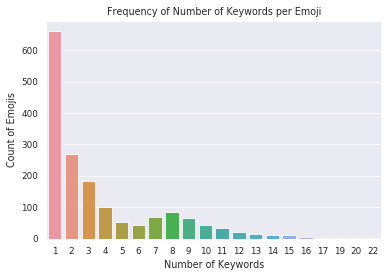

In [138]:
import seaborn as sns
sns.set(style="darkgrid", context="paper")

# Plot the responses for different events and regions
# p = sns.distplot([len(emoji_desc[emoji]) for emoji in emoji_desc], hist=False, color="g", kde_kws={"shade": True}, 
p = sns.countplot([len(emoji_desc[emoji]) for emoji in emoji_desc]) #, axlabel="Number of Keywords")
p.set(xlabel="Number of Keywords", ylabel='Count of Emojis')
p.set_title("Frequency of Number of Keywords per Emoji")
p.get_figure().savefig("../plots/KeywordFrequency.png")

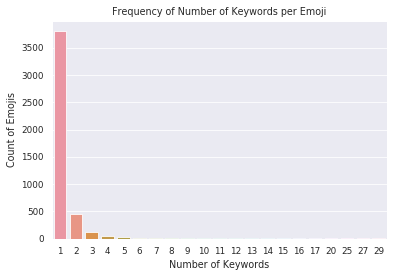

In [139]:
p = sns.countplot([len(desc_emoji[desc]) for desc in desc_emoji]) #, axlabel="Number of Keywords")
p.set(xlabel="Number of Keywords", ylabel='Count of Emojis')
p.set_title("Frequency of Number of Keywords per Emoji")
p.get_figure().savefig("../plots/KeywordFrequency.png")